In [1]:
import jieba
import xlrd
import sys

In [2]:
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

In [3]:
workbook=xlrd.open_workbook('mysheet.xlsx')
workbook

In [4]:
worksheet = workbook.sheet_by_name('nnsheet')
worksheet

In [5]:
nrows = worksheet.nrows
nrows

561

In [6]:
ncols = worksheet.ncols
ncols

9

In [7]:
worksheet.col(0)[1].value

'︎ 5月23号，在济南奥体中心体育馆，现场有宝马，奔驰，mini等大奖，悠家独家演唱会，即将开启——︎ 我们与你不见不散'

In [8]:
count =1
for i in range(1,nrows):
    jieba1 = jieba.cut(worksheet.col(0)[i].value, cut_all=False) #精确模式
    for x in jieba1:
        if x != '':
            f = open('car.txt','a+', encoding='utf-8')
            f.write(x)
            f.write('\n')
            f.close()
        else:
            print(u'关键词为空')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.546 seconds.
Prefix dict has been built succesfully.


In [42]:
import nltk
list = []
with open('car.txt','r',encoding='utf-8') as f:    #打开结巴分好的词文本A
    lines = f.readlines()
    for x in lines:
        list.append(x.strip('\n'))    #添加到列表
        f.close()    #关闭文本A

fdist1 = nltk.FreqDist(list)    #去重 + 词频统计
fdist1.most_common(20)

[(' ', 479),
 ('，', 450),
 ('的', 296),
 ('宝马', 192),
 ('/', 141),
 ('。', 125),
 ('！', 114),
 ('了', 111),
 ('@', 87),
 ('#', 80),
 ('全新', 66),
 (':', 63),
 ('雷克萨斯', 57),
 ('？', 55),
 ('在', 53),
 ('是', 53),
 ('将', 53),
 ('汽车', 52),
 ('系', 50),
 ('我', 49)]

In [43]:
car_word = {key:value for key, value in fdist1.items() if key.isalpha() and len(key)>1}
car_sort = sorted(car_word.items(), key=lambda d:d[1], reverse=True)
car_sort

[('宝马', 192),
 ('全新', 66),
 ('雷克萨斯', 57),
 ('汽车', 52),
 ('奔驰', 48),
 ('车展', 45),
 ('车型', 36),
 ('上海', 34),
 ('Acura', 30),
 ('奥迪', 30),
 ('宝沃', 30),
 ('我们', 29),
 ('BMW', 29),
 ('直播', 26),
 ('上市', 26),
 ('优惠', 24),
 ('SUV', 23),
 ('LS', 22),
 ('一个', 22),
 ('新车', 22),
 ('讴歌', 22),
 ('这个', 22),
 ('喜欢', 19),
 ('现场', 18),
 ('全球', 18),
 ('Lexus', 18),
 ('市场', 18),
 ('Amazing', 17),
 ('Driving', 17),
 ('推出', 16),
 ('今天', 16),
 ('strong', 16),
 ('taggedby', 16),
 ('hylanda', 16),
 ('品牌', 15),
 ('设计', 15),
 ('国产', 15),
 ('中国', 15),
 ('性能', 14),
 ('发动机', 14),
 ('可以', 14),
 ('专家', 13),
 ('跑车', 13),
 ('哈哈哈', 13),
 ('开启', 12),
 ('超跑', 12),
 ('什么', 12),
 ('车身', 12),
 ('万元', 12),
 ('进口', 12),
 ('丰田', 12),
 ('展台', 11),
 ('驾驶', 11),
 ('LC', 11),
 ('传奇', 11),
 ('德系', 11),
 ('庞巴迪', 11),
 ('知道', 11),
 ('体验', 10),
 ('进行', 10),
 ('视频', 10),
 ('运动', 10),
 ('豪华', 10),
 ('热点话题', 10),
 ('年前', 10),
 ('第一代', 10),
 ('震撼', 10),
 ('豪华车', 10),
 ('美系', 10),
 ('发布', 10),
 ('采用', 10),
 ('多少', 10),
 ('引擎', 10),
 ('平台', 

In [44]:
type(car_sort)

list

In [45]:
car_sort[0][0]

'宝马'

In [46]:
car_sort[0][1]

192

In [47]:
import numpy as np
np.arange(0,2)

array([0, 1])

In [48]:
len(car_sort)

2382

In [49]:
car_sort[2][0]

'雷克萨斯'

In [50]:
wname = []
for i in range(0, len(car_sort)):
    wname.append(car_sort[i][0])
    
print(wname[:10])

['宝马', '全新', '雷克萨斯', '汽车', '奔驰', '车展', '车型', '上海', 'Acura', '奥迪']


In [51]:
value = []
for i in range(0, len(car_sort)):
    value.append(car_sort[i][1])

print(value[:10])

[192, 66, 57, 52, 48, 45, 36, 34, 30, 30]


In [52]:
type(wname)

list

In [53]:
value[0]

192

In [54]:
len(value)

2382

In [55]:
len(value)

2382

In [56]:
value[:20]

[192,
 66,
 57,
 52,
 48,
 45,
 36,
 34,
 30,
 30,
 30,
 29,
 29,
 26,
 26,
 24,
 23,
 22,
 22,
 22]

In [57]:
file = open('extractname.txt','w', encoding='utf-8')
for word in wname:
    file.write(word + '\n')

In [58]:
file1 = open('extractvalue.txt','w', encoding='utf-8')
for val in value:
    file1.write(str(val) + '\n')

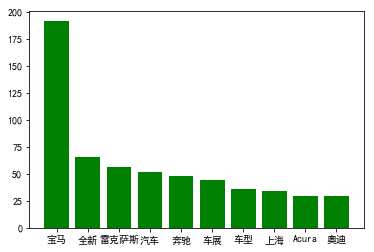

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei']
x = range(0,10)
plt.bar(x, value[:10],color='g')
plt.xticks(x, (wname[:10]))
plt.show()